In [2]:
!pip install gradio

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [4]:
import pathlib
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,untar=True)
data_dir=pathlib.Path(data_dir)
data_dir = data_dir / 'flower_photos' # Correct the path to the nested directory

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/root/.keras/datasets/flower_photos/flower_photos/roses/18741313803_1bbf842fc6_n.jpg


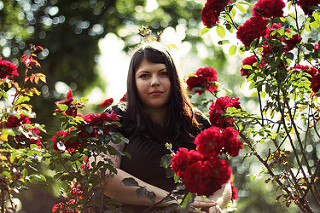

In [5]:
roses=list(data_dir.glob('roses/*'))
print(roses[0])
PIL.Image.open(str(roses[0]))

In [6]:
img_height,img_width=180,180
batch_size=32
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [7]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [8]:
class_names=train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


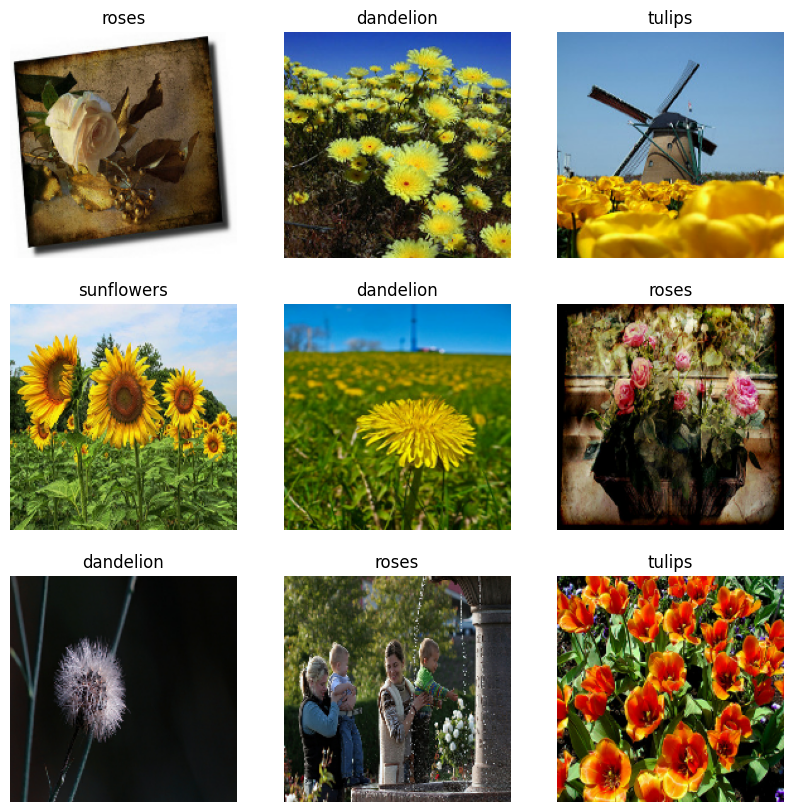

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for Images,labels in train_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(Images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [10]:
num_classes=5
model=Sequential([
    layers.Rescaling(1./255,input_shape=(img_height,img_width,3)),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes,activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
from IPython.core import history
epochs=10
history=model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


92/92 ━━━━━━━━━━━━━━━━━━━━ 65s 691ms/step - accuracy: 0.3363 - loss: 1.7389 - val_accuracy: 0.5477 - val_loss: 1.1451
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 62s 678ms/step - accuracy: 0.5735 - loss: 1.0619 - val_accuracy: 0.5490 - val_loss: 1.0807
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 82s 677ms/step - accuracy: 0.6446 - loss: 0.8900 - val_accuracy: 0.5858 - val_loss: 1.0347
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 83s 686ms/step - accuracy: 0.7026 - loss: 0.7657 - val_accuracy: 0.6035 - val_loss: 0.9931
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 63s 682ms/step - accuracy: 0.7728 - loss: 0.5903 - val_accuracy: 0.6540 - val_loss: 1.0063
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 82s 686ms/step - accuracy: 0.8625 - loss: 0.3893 - val_accuracy: 0.6308 - val_loss: 1.2804
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 81s 680ms/step - accuracy: 0.9127 - loss: 0.2526 - val_accuracy: 0.6458 - val_loss: 1.4144
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 63s 681ms/step - accuracy: 0.9596 - loss: 0.1303 - val_accuracy: 0.645

In [13]:
def predict_image(img):
  # img is a numpy array from Gradio
  # Convert to TensorFlow tensor
  img_tensor = tf.convert_to_tensor(img, dtype=tf.float32)
  # Resize the image to the target size (img_height, img_width)
  img_resized = tf.image.resize(img_tensor, (img_height, img_width))
  # Add a batch dimension: (1, img_height, img_width, 3)
  img_batch = tf.expand_dims(img_resized, 0)
  prediction = model.predict(img_batch)[0]
  return {class_names[i]:float(prediction[i]) for i in range(len(class_names))}

In [ ]:
import gradio as gr
image=gr.Image()
label=gr.Label(num_top_classes=5)
gr.Interface(fn=predict_image,inputs=image,outputs=label).launch(debug=True)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://1131bff423f0db4bd8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
